In [1]:
import pandas as pd
import analysis_utility
import text_scene_detection_utility
%matplotlib inline

### OCR-Test on Memotion Data

In [2]:
train_path = r'data\memotion_dataset\memotion_dataset_7k/labels.csv'
train_df = pd.read_csv(train_path, index_col=0)
train_df.head(1)

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive


#### get a random sample

In [3]:
train_df = train_df.sample(n=1000, random_state=11)

In [4]:
train_df.head(1)

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
152,image_153.png,BEST OF BARNEY I only have one rule. Never scr...,BEST OF BARNEY I only have one rule. Never scr...,very_funny,general,very_offensive,motivational,positive


#### perform OCR on df

In [5]:
df_result = analysis_utility.ocr_on_df(df=train_df, ds_name='memotion', path='data/memotion_dataset\memotion_dataset_7k/images/', img_format='jpg')

999

In [6]:
df_result.to_csv('memotion_without_font_color_ocr_result.csv')

#### add KPIs on df

In [7]:
df_result = analysis_utility.add_columns_on_df(df_result, ['cos_similarity'])

In [8]:
df_result.confidence.mean()

60.394573993987976

In [9]:
df_result.cos_similarity.mean()

66.0077469471971

In [10]:
df_result

,ds_name,_id,confidence,orig_text,pred_text,font_color,all_mean_edge_colors,cos_similarity
0,memotion,image_153,8.109093,best of barney i only have one rule. never scr...,best. of barney — oe on eo,white,47.836880,30.618622
1,memotion,image_6326,94.772041,oh. so you think willy wonka can be condescend...,oh. so you think why wonka can be condescendin...,white,84.055865,75.000000
2,memotion,image_173,0.000000,brazzers logo is the same as the mr. bean meme...,brazzers logo is the same the bean meme. o,white,48.814365,87.038828
3,memotion,image_2002,0.000000,if hillary will pay me 50k i'll post pro hilla...,if hillary will pay me 50k kb post pro hillary...,white,117.959570,61.339562
4,memotion,image_1513,0.000000,when he keep telling you you're not his girlf...,"when he keep iczilitare] you, you're fave) ac ...",black,250.373082,78.947368
...,...,...,...,...,...,...,...,...
993,memotion,image_4194,0.000000,"told a bitch to spell orange and she asked "" t...",told f2) bitch to spell orange lately she aske...,black,244.060156,81.250000
994,memotion,image_6000,96.546745,this is bill. bill likes to use omegle in his ...,this is bill omeglein his free bill show his p...,black,254.647994,74.077853
995,memotion,image_5105,94.825706,us intelligence images of how hitler could hav...,us ftalcailret=raress images of how hitler foe...,black,252.139262,71.004695
996,memotion,image_3093,0.000000,when your younger sibling asks why you never l...,tite your younger sibling asks why you never l...,black,200.692654,58.268563


<AxesSubplot:>

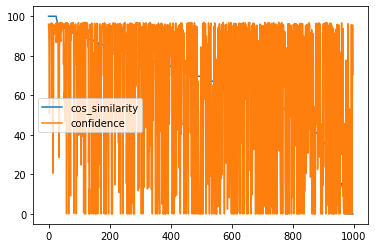

In [11]:
df_result[['cos_similarity', 'confidence']].sort_values(by='cos_similarity', ascending=False).reset_index(drop=True).plot(kind='line')